In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

cid = 'bbda48e6d157461bb31fadde82b7e6bb'
secret = '108955999c084290820e690c79e3ca9c'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [3]:
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

#get liked songs, for some reason spotipy only allows 100 at a time
likes_ids1 = getTrackIDs('katiebourque', 'spotify:playlist:1JQR73ivklTvWqAkUlbGD7') #my username, playlist URI grabbed from spotify
likes_ids2 = getTrackIDs('katiebourque', 'spotify:playlist:6eZNZJnqE91aaB16WvP29m')
likes_ids3 = getTrackIDs('katiebourque', 'spotify:playlist:32M6GbmgJAQWv8rCOULEL9')
likes_ids4 = getTrackIDs('katiebourque', 'spotify:playlist:4qQh2xO2WQF25mxiO2bM0B')
likes_ids5 = getTrackIDs('katiebourque', 'spotify:playlist:6Fk17f59hhQfvN2G1lnhyd')

likes_ids = likes_ids1 + likes_ids2 + likes_ids3 + likes_ids4 + likes_ids5

#get disliked songs
dislikes_ids1 = getTrackIDs('katiebourque', 'spotify:playlist:0xo45Ulk9tUOBuou2clSLc')
dislikes_ids2 = getTrackIDs('katiebourque', 'spotify:playlist:4MfB6aqAo7xiO4Y0EWeTNd')
dislikes_ids3 = getTrackIDs('katiebourque', 'spotify:playlist:19MWNqLZp7sxuPzXpXsgvY')
dislikes_ids4 = getTrackIDs('katiebourque', 'spotify:playlist:71kf8aOILJK23Yelpa9UMZ')
dislikes_ids5 = getTrackIDs('katiebourque', 'spotify:playlist:2EKXA90DYveN1ZupVRIHkj')

dislikes_ids = dislikes_ids1 + dislikes_ids2 + dislikes_ids3 + dislikes_ids4 + dislikes_ids5

#check that data is actually coming through
print(len(likes_ids)) 
print(len(dislikes_ids))

500
500


In [4]:
#method to grab audio features from spotify api
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

  # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    duration_ms = meta['duration_ms']
    popularity = meta['popularity']

  # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    key = features[0]['key']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    mode = features[0]['mode']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    valence = features[0]['valence']

    track = [name, album, artist, release_date, duration_ms, popularity, acousticness, danceability, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence]
    return track


In [1]:
#adding liked tracks to dataframe
likes_tracks = []
for i in range(len(likes_ids)):
    time.sleep(.5)
    track = getTrackFeatures(likes_ids[i])
    likes_tracks.append(track)



likes_df = pd.DataFrame(likes_tracks, columns = ['name', 'album', 'artist', 'release_date', 'length_ms', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence'])
likes_df.to_csv("likes.csv", sep = ',')

NameError: name 'likes_ids' is not defined

In [6]:
#adding disliked tracks to dataframe
dislikes_tracks = []
for i in range(len(dislikes_ids)):
    time.sleep(.5)
    track = getTrackFeatures(dislikes_ids[i])
    dislikes_tracks.append(track)
    
dislikes_df = pd.DataFrame(dislikes_tracks, columns = ['name', 'album', 'artist', 'release_date', 'length_ms', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence'])
dislikes_df.to_csv("likes.csv", sep = ',')

In [7]:
#dropping length and popularity features
new_likes = likes_df.drop(['length_ms', 'popularity'], axis=1)
new_dislikes = dislikes_df.drop(['length_ms', 'popularity'], axis=1)

In [9]:
#checking out the audio features
new_likes.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.309835,0.678306,0.575216,0.050594,5.110000,0.179011,-8.222988,0.574000,0.116658,113.322912,3.928000,0.603931
std,0.260901,0.140232,0.169725,0.169629,3.593289,0.149102,3.018003,0.494989,0.114312,28.948799,0.362047,0.214608
min,0.000131,0.262000,0.097200,0.000000,0.000000,0.023300,-20.178000,0.000000,0.023700,60.493000,1.000000,0.035200
25%,0.088050,0.596750,0.452750,0.000000,1.000000,0.090100,-9.941750,0.000000,0.038075,91.320750,4.000000,0.458000
50%,0.231500,0.699500,0.583000,0.000021,5.000000,0.123000,-7.828000,1.000000,0.060750,108.005000,4.000000,0.618000
75%,0.482000,0.787250,0.689500,0.002345,8.000000,0.211250,-6.156500,1.000000,0.157500,130.012500,4.000000,0.770250
max,0.951000,0.959000,0.956000,0.981000,11.000000,0.972000,-1.472000,1.000000,0.597000,210.164000,5.000000,0.979000


In [10]:
new_dislikes.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.251159,0.662502,0.613432,0.042236,5.15600,0.188103,-7.274624,0.592000,0.131506,118.842592,3.978000,0.511045
std,0.243757,0.152218,0.170582,0.153246,3.61965,0.140363,3.035902,0.491955,0.123252,29.460153,0.248273,0.233206
min,0.000244,0.170000,0.054900,0.000000,0.00000,0.024400,-21.593000,0.000000,0.024100,67.027000,1.000000,0.040000
25%,0.050975,0.563000,0.503750,0.000000,1.00000,0.096600,-8.864000,0.000000,0.039650,94.200250,4.000000,0.340000
50%,0.162000,0.672000,0.621000,0.000001,6.00000,0.124000,-6.807500,1.000000,0.070750,116.955500,4.000000,0.505000
75%,0.414000,0.786250,0.732250,0.000282,8.00000,0.248750,-5.169500,1.000000,0.202750,140.187250,4.000000,0.691000
max,0.995000,0.967000,0.963000,0.943000,11.00000,0.773000,-1.304000,1.000000,0.827000,211.261000,5.000000,0.978000


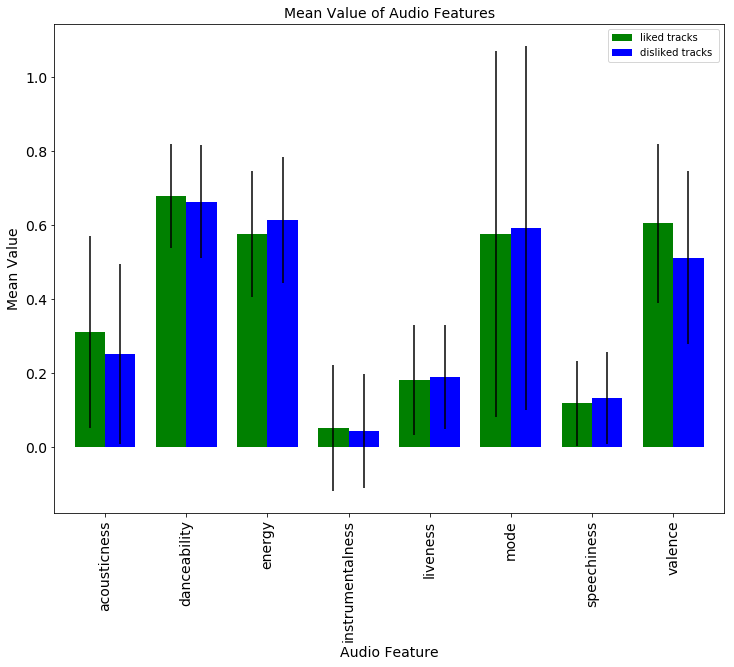

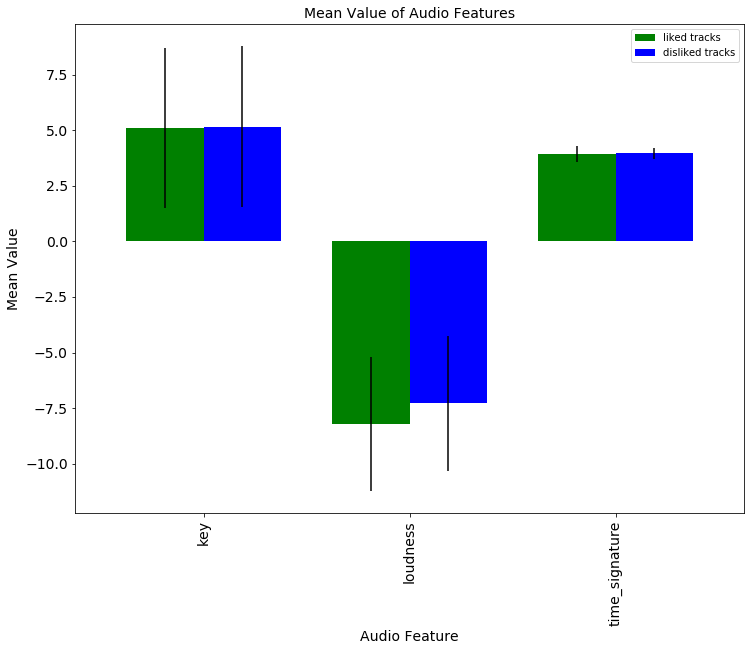

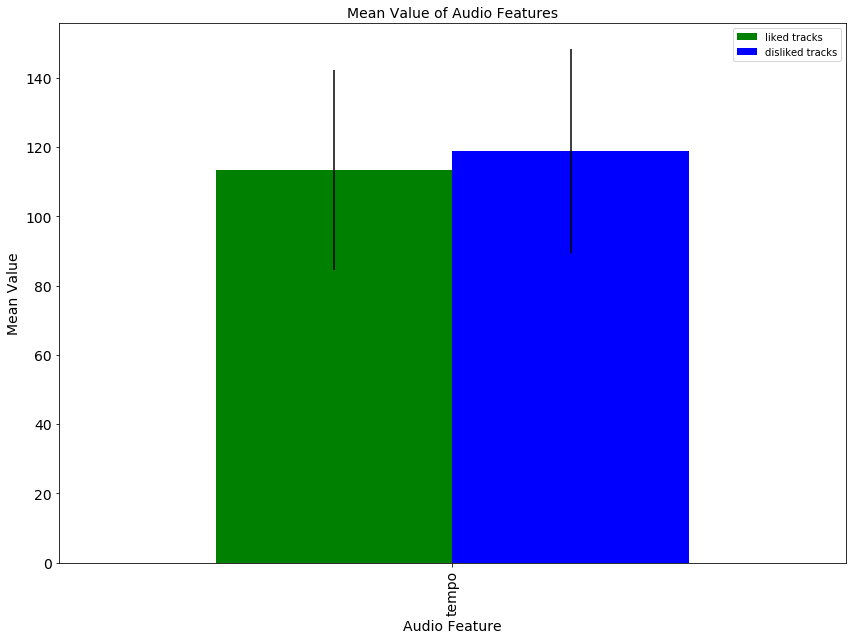

In [11]:
likes = new_likes.describe()
dislikes = new_dislikes.describe()

# get size
fig_size = plt.rcParams['figure.figsize']
 
# set width and height
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

# create bar plots
avgs = pd.concat([likes.iloc[1,[0,1,2,3,5,7,8,11]].rename('liked tracks'), 
                  dislikes.iloc[1,[0,1,2,3,5,7,8,11]].rename('disliked tracks ') 
                  ], axis=1).plot(kind='bar', 
                                                                 width=.75, 
                                                                 fontsize=14,
                                                                 yerr=[likes.iloc[2,[0,1,2,3,5,7,8,11]], 
                                                                       dislikes.iloc[2,[0,1,2,3,5,7,8,11]] 
                                                                       ],
                                                                 color=['g','b'])

avgs2 = pd.concat([likes.iloc[1,[4,6,10]].rename('liked tracks'), 
                  dislikes.iloc[1,[4,6,10]].rename('disliked tracks') 
                  ], axis=1).plot(kind='bar', 
                                                                 width=.75, 
                                                                 fontsize=14,
                                                                 yerr=[likes.iloc[2,[4,6,10]], 
                                                                       dislikes.iloc[2,[4,6,10]] 
                                                                       ],
                                                                 color=['g','b'])

avgs3 = pd.concat([likes.iloc[1,[9]].rename('liked tracks'), 
                  dislikes.iloc[1,[9]].rename('disliked tracks') 
                  ], axis=1).plot(kind='bar', 
                                                                 width=.75, 
                                                                 fontsize=14,
                                                                 yerr=[likes.iloc[2,[9]], 
                                                                       dislikes.iloc[2,[9]] 
                                                                       ],
                                                                 color=['g','b'])
# title, axis labels
avgs.set_title('Mean Value of Audio Features', fontsize=14)
avgs.set_xlabel('Audio Feature', fontsize=14)
avgs.set_ylabel('Mean Value', fontsize=14)

avgs2.set_title('Mean Value of Audio Features', fontsize=14)
avgs2.set_xlabel('Audio Feature', fontsize=14)
avgs2.set_ylabel('Mean Value', fontsize=14)

avgs3.set_title('Mean Value of Audio Features', fontsize=14)
avgs3.set_xlabel('Audio Feature', fontsize=14)
avgs3.set_ylabel('Mean Value', fontsize=14)


plt.tight_layout()
plt.show()

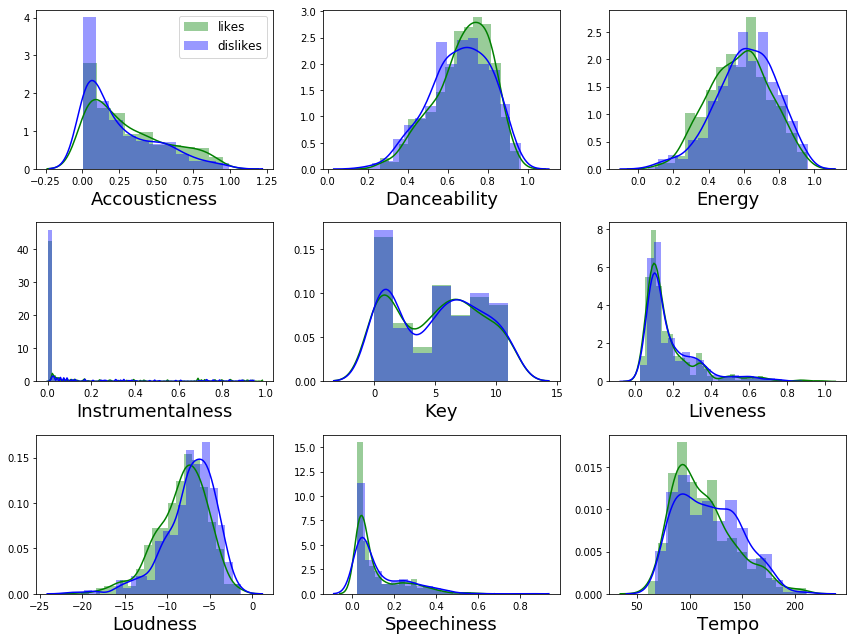

In [100]:
#plotting distributions of each feature
plt.subplot(331)
sns.distplot(likes_df.acousticness, color='g', label='likes')
sns.distplot(dislikes_df.acousticness, color='b', label='dislikes')
plt.xlabel('Accousticness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(likes_df.danceability, color='g', label='likes')
sns.distplot(dislikes_df.danceability, color='b', label='dislikes')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(333)
sns.distplot(likes_df.energy, color='g', label='likes')
sns.distplot(dislikes_df.energy, color='b', label='dislikes')
plt.xlabel('Energy', fontsize=18)

plt.subplot(334)
sns.distplot(likes_df.instrumentalness, color='g', label='likes')
sns.distplot(dislikes_df.instrumentalness, color='b', label='dislikes')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(335)
sns.distplot(likes_df.key, color='g', label='likes')
sns.distplot(dislikes_df.key, color='b', label='dislikes')
plt.xlabel('Key', fontsize=18)

plt.subplot(336)
sns.distplot(likes_df.liveness, color='g', label='likes')
sns.distplot(dislikes_df.liveness, color='b', label='dislikes')
plt.xlabel('Liveness', fontsize=18)

plt.subplot(337)
sns.distplot(likes_df.loudness, color='g', label='likes')
sns.distplot(dislikes_df.loudness, color='b', label='dislikes')
plt.xlabel('Loudness', fontsize=18)

plt.subplot(338)
sns.distplot(likes_df.speechiness, color='g', label='likes')
sns.distplot(dislikes_df.speechiness, color='b', label='dislikes')
plt.xlabel('Speechiness', fontsize=18)

plt.subplot(339)
sns.distplot(likes_df.tempo, color='g', label='likes')
sns.distplot(dislikes_df.tempo, color='b', label='dislikes')
plt.xlabel('Tempo', fontsize=18)


plt.tight_layout()
plt.show()

/Users/katiebourque/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:345: UserWarning: tight_layout not applied: number of columns in subplot specifications mustbe multiples of one another.
  warnings.warn('tight_layout not applied: '


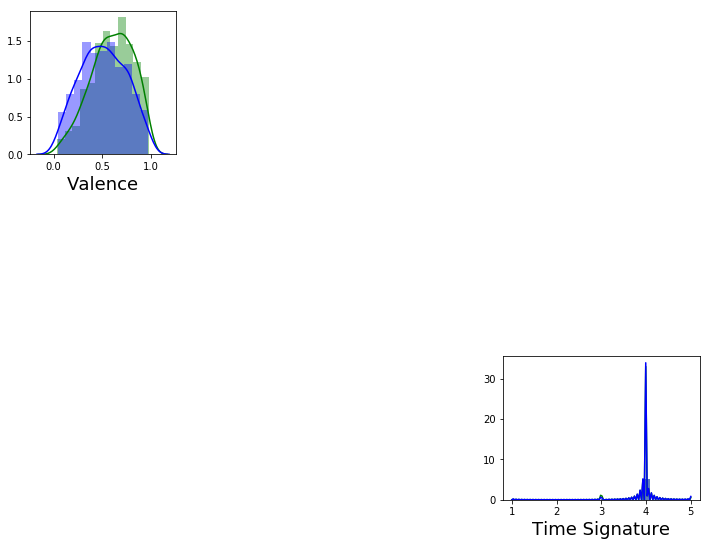

In [101]:
#plotted separately just for ease of screenshotting for paper
plt.subplot(339)
sns.distplot(likes_df.time_signature, color='g', label='likes')
sns.distplot(dislikes_df.time_signature, color='b', label='dislikes')
plt.xlabel('Time Signature', fontsize=18)

plt.subplot(341)
sns.distplot(likes_df.valence, color='g', label='likes')
sns.distplot(dislikes_df.valence, color='b', label='dislikes')
plt.xlabel('Valence', fontsize=18)

plt.tight_layout()
plt.show()

In [14]:
# preprocessing for PLA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, matthews_corrcoef, log_loss,
                             mean_squared_error, auc)
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

# add target column with 1 representing likes and 0 representing dislikes
likes_df['target'] = 1
dislikes_df['target'] = 0

# combine likes and dislikes into one df
combined = pd.concat([likes_df,dislikes_df], ignore_index=True)

In [15]:
combined

,name,album,artist,release_date,length_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,ball w/o you,i am > i was (Deluxe),21 Savage,2018-12-24,195046,56,0.04670,0.892,0.633,0.000189,8,0.1390,-7.471,1,0.0902,137.994,4,0.4590,1
1,FaceTime,Issa Album,21 Savage,2017-09-23,239160,56,0.21900,0.701,0.624,0.000000,10,0.1070,-11.115,1,0.3060,93.024,4,0.3830,1
2,a lot,i am > i was (Deluxe),21 Savage,2018-12-24,288624,56,0.03950,0.837,0.636,0.001250,1,0.3420,-7.643,1,0.0860,145.972,4,0.2740,1
3,Mr. Right Now (feat. Drake),SAVAGE MODE II,21 Savage,2020-10-02,193838,85,0.23100,0.647,0.667,0.000000,5,0.1330,-5.563,1,0.3040,172.080,4,0.7040,1
4,Rich Nigga Shit (feat. Young Thug),SAVAGE MODE II,21 Savage,2020-10-02,190331,77,0.34900,0.825,0.733,0.000000,1,0.1120,-5.625,0,0.0969,97.974,4,0.6200,1
5,Thug Life,Issa Album,21 Savage,2017-09-23,263426,51,0.15900,0.800,0.467,0.000000,0,0.6530,-9.974,1,0.4500,132.054,4,0.3070,1
6,I Said Me,Rap Or Go To The League,2 Chainz,2019-03-01,331693,45,0.31200,0.709,0.503,0.000000,7,0.2100,-5.762,1,0.5380,87.673,4,0.2600,1
7,It's A Vibe,Pretty Girls Like Trap Music,2 Chainz,2017-06-16,210200,73,0.03120,0.822,0.502,0.000887,7,0.1140,-7.380,1,0.1480,73.003,4,0.5250,1
8,MFN Right - Remix,MFN Right (Remix),2 Chainz,2016-05-20,226240,44,0.01460,0.894,0.327,0.000086,5,0.0938,-9.463,0,0.4230,140.005,4,0.2330,1
9,Money Maker (feat. Lil Wayne),So Help Me God!,2 Chainz,2020-11-13,178993,59,0.20000,0.801,0.859,0.000001,5,0.1040,-4.993,1,0.1830,140.020,4,0.6870,1


In [31]:
#dropping release date
Combined = combined.drop('release_date', axis=1)
Combined

,album,artist,length_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,i am > i was (Deluxe),21 Savage,195046,56,0.04670,0.892,0.633,0.000189,8,0.1390,-7.471,1,0.0902,137.994,4,0.4590,1
1,Issa Album,21 Savage,239160,56,0.21900,0.701,0.624,0.000000,10,0.1070,-11.115,1,0.3060,93.024,4,0.3830,1
2,i am > i was (Deluxe),21 Savage,288624,56,0.03950,0.837,0.636,0.001250,1,0.3420,-7.643,1,0.0860,145.972,4,0.2740,1
3,SAVAGE MODE II,21 Savage,193838,85,0.23100,0.647,0.667,0.000000,5,0.1330,-5.563,1,0.3040,172.080,4,0.7040,1
4,SAVAGE MODE II,21 Savage,190331,77,0.34900,0.825,0.733,0.000000,1,0.1120,-5.625,0,0.0969,97.974,4,0.6200,1
5,Issa Album,21 Savage,263426,51,0.15900,0.800,0.467,0.000000,0,0.6530,-9.974,1,0.4500,132.054,4,0.3070,1
6,Rap Or Go To The League,2 Chainz,331693,45,0.31200,0.709,0.503,0.000000,7,0.2100,-5.762,1,0.5380,87.673,4,0.2600,1
7,Pretty Girls Like Trap Music,2 Chainz,210200,73,0.03120,0.822,0.502,0.000887,7,0.1140,-7.380,1,0.1480,73.003,4,0.5250,1
8,MFN Right (Remix),2 Chainz,226240,44,0.01460,0.894,0.327,0.000086,5,0.0938,-9.463,0,0.4230,140.005,4,0.2330,1
9,So Help Me God!,2 Chainz,178993,59,0.20000,0.801,0.859,0.000001,5,0.1040,-4.993,1,0.1830,140.020,4,0.6870,1


In [32]:
def sigmoid(z):

 #Compute the sigmoid of z. z is a scalar or numpy array of any size
    s = 1/(1 + np.exp(-z))
 
    return s

def initialize_with_zeros(m):
    w = np.zeros((m, 1))
    b = 0
 
 
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
 
 # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X)+ b) # compute activation
    cost = -(1/m)*(np.sum((Y*np.log(A)) + (1-Y) *np.log(1-A)))
 
 # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1/m)* np.dot(X, ((A-Y).T))
    db = (1/m) * np.sum(A-Y)
    grads = {"dw": dw,"db": db}
 
    return grads, cost

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
 
    A = sigmoid(np.dot(w.T, X) + b)
 
    for i in range(A.shape[1]):
 # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0,i] = 1 if A[0, i] > 0.5 else 0
    pass

 
    return Y_prediction

In [33]:
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [37]:
X_train = Combined.drop(['target', 'album', 'artist'], axis=1)
Y_train = Combined['target']

x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train,test_size = 0.2, random_state = 0)

print('dimension of x_train: ', x_train.shape)
print('dimension of x_test: ', x_test.shape)

X_train

the dimension of the x_train:  (800, 14)
the dimension of the x_test:  (200, 14)


,length_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,195046,56,0.04670,0.892,0.633,0.000189,8,0.1390,-7.471,1,0.0902,137.994,4,0.4590
1,239160,56,0.21900,0.701,0.624,0.000000,10,0.1070,-11.115,1,0.3060,93.024,4,0.3830
2,288624,56,0.03950,0.837,0.636,0.001250,1,0.3420,-7.643,1,0.0860,145.972,4,0.2740
3,193838,85,0.23100,0.647,0.667,0.000000,5,0.1330,-5.563,1,0.3040,172.080,4,0.7040
4,190331,77,0.34900,0.825,0.733,0.000000,1,0.1120,-5.625,0,0.0969,97.974,4,0.6200
5,263426,51,0.15900,0.800,0.467,0.000000,0,0.6530,-9.974,1,0.4500,132.054,4,0.3070
6,331693,45,0.31200,0.709,0.503,0.000000,7,0.2100,-5.762,1,0.5380,87.673,4,0.2600
7,210200,73,0.03120,0.822,0.502,0.000887,7,0.1140,-7.380,1,0.1480,73.003,4,0.5250
8,226240,44,0.01460,0.894,0.327,0.000086,5,0.0938,-9.463,0,0.4230,140.005,4,0.2330
9,178993,59,0.20000,0.801,0.859,0.000001,5,0.1040,-4.993,1,0.1830,140.020,4,0.6870


In [38]:
# Logistic Regression
log = LogisticRegression()
log.fit(x_train,y_train)
log_y_pred = log.predict(x_test)
log_result_train = round(log.score(x_train,y_train)*100,2)

print('1. Logistic Regression: ', log_result_train)

1. Logistic Regression:  57.88


/Users/katiebourque/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 6.0, 'Features')

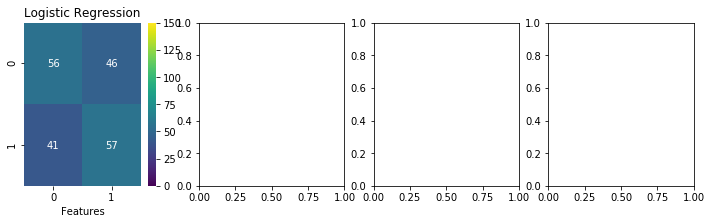

In [44]:

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize = (12,3))
#1. Logistic Regression
LogregCM = confusion_matrix(y_test,log_y_pred)
sns.heatmap(LogregCM, annot = True, fmt = 'd', vmin = 0, vmax = 150,cmap = 'viridis', ax = ax1)
#Annot: the value of the heatmap
#fmt: the decimal point of value of heatmap
#vmin, vmax: the limits of the colorbar
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Features')

In [50]:
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import pandas as pd
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [75]:
X_train = Combined.drop(['target', 'album', 'artist', 'popularity', 'length_ms'], axis=1)
Y_train = Combined['target']

x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train,test_size = 0.2, random_state = 0)

print('the dimension of the x_train: ', x_train.shape)
print('the dimension of the x_test: ', x_test.shape)




the dimension of the x_train:  (800, 12)
the dimension of the x_test:  (200, 12)


In [91]:
X_train

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.04670,0.892,0.633,0.000189,8,0.1390,-7.471,1,0.0902,137.994,4,0.4590
1,0.21900,0.701,0.624,0.000000,10,0.1070,-11.115,1,0.3060,93.024,4,0.3830
2,0.03950,0.837,0.636,0.001250,1,0.3420,-7.643,1,0.0860,145.972,4,0.2740
3,0.23100,0.647,0.667,0.000000,5,0.1330,-5.563,1,0.3040,172.080,4,0.7040
4,0.34900,0.825,0.733,0.000000,1,0.1120,-5.625,0,0.0969,97.974,4,0.6200
5,0.15900,0.800,0.467,0.000000,0,0.6530,-9.974,1,0.4500,132.054,4,0.3070
6,0.31200,0.709,0.503,0.000000,7,0.2100,-5.762,1,0.5380,87.673,4,0.2600
7,0.03120,0.822,0.502,0.000887,7,0.1140,-7.380,1,0.1480,73.003,4,0.5250
8,0.01460,0.894,0.327,0.000086,5,0.0938,-9.463,0,0.4230,140.005,4,0.2330
9,0.20000,0.801,0.859,0.000001,5,0.1040,-4.993,1,0.1830,140.020,4,0.6870


In [76]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [142]:
mlp = MLPClassifier(hidden_layer_sizes=(10,8,6,4), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train, y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))



[[253 145]
 [153 249]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       398
           1       0.63      0.62      0.63       402

   micro avg       0.63      0.63      0.63       800
   macro avg       0.63      0.63      0.63       800
weighted avg       0.63      0.63      0.63       800



'\n249 songs were correctly classified as likes\n149 songs were incorrectly classified as likes\n249 songs were correctly classified as dislikes\n153 songs were incorrectly classified as dislikes\n'

In [145]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))



[[61 41]
 [36 62]]
              precision    recall  f1-score   support

           0       0.63      0.60      0.61       102
           1       0.60      0.63      0.62        98

   micro avg       0.61      0.61      0.61       200
   macro avg       0.62      0.62      0.61       200
weighted avg       0.62      0.61      0.61       200



'\nwhen testing the performance of the model:\n61 songs were correctly classified as likes\n57 songs were correctly classified as dislikes\n41 songs were incorrectly classified as likes\n41 songs were incorrectly classified as dislikes\n\n'

In [146]:
validation_likes = getTrackIDs('katiebourque', 'spotify:playlist:3OhckWdLsdnubgGE1aLI96') #my username, playlist URI grabbed from spotify
validation_dislikes = getTrackIDs('katiebourque', 'spotify:playlist:2klva1r31tN3KndXkXHFmY')

In [147]:
vlikes_tracks = []
for i in range(len(validation_likes)):
    time.sleep(.5)
    track = getTrackFeatures(validation_likes[i])
    vlikes_tracks.append(track)



vlikes_df = pd.DataFrame(vlikes_tracks, columns = ['name', 'album', 'artist', 'release_date', 'length_ms', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence'])
vlikes_df.to_csv("likes.csv", sep = ',')

In [121]:
vdislikes_tracks = []
for i in range(len(validation_dislikes)):
    time.sleep(.5)
    track = getTrackFeatures(validation_dislikes[i])
    vdislikes_tracks.append(track)



vdislikes_df = pd.DataFrame(vdislikes_tracks, columns = ['name', 'album', 'artist', 'release_date', 'length_ms', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence'])
vdislikes_df.to_csv("likes.csv", sep = ',')

In [122]:
vlikes_df

,name,album,artist,release_date,length_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Kool Aid,Sis.,KIRBY,2020-01-31,153441,43,0.18300,0.566,0.728,0.004250,4,0.1100,-4.546,0,0.1210,155.251,3,0.467
1,Main Squeeze,Eccentric Soul: Twinight's Lunar Rotation,Various Artists,2007-03-13,194386,34,0.28900,0.436,0.717,0.000109,0,0.2110,-7.285,1,0.0488,179.681,4,0.914
2,Love Me Like (feat. DUCKWRTH),Love Me Like,Rayana Jay,2019-03-22,164746,53,0.73100,0.874,0.558,0.000638,5,0.1060,-9.814,0,0.2250,118.021,4,0.451
3,It's Too Late to Turn Back Now,Everybody,Rose Cornelius,2012-09-01,332133,32,0.16700,0.726,0.632,0.000000,0,0.1540,-10.982,1,0.0331,111.013,4,0.946
4,I Am Your Mind (Part 2),Virgin Ubiquity II,Roy Ayers,2018-12-01,515840,43,0.13800,0.694,0.598,0.002690,2,0.3450,-8.177,0,0.0400,108.633,4,0.962
5,Lotus 72 D,Lotus 72 D,Zé Roberto,1973,192965,40,0.62800,0.733,0.676,0.181000,9,0.2770,-9.735,0,0.0771,91.389,4,0.960
6,Khala My Friend,Africa,Amanaz,1975,203716,56,0.02120,0.588,0.407,0.427000,1,0.1200,-14.169,1,0.0362,87.565,4,0.362
7,SUMMER BLUE,Late Late Summer,Bread And Butter,1979,239893,40,0.46000,0.636,0.517,0.000018,0,0.0753,-8.998,1,0.0348,165.282,4,0.855
8,I Am Not Afraid,In the Night,Charley Crockett,2016-06-06,164538,56,0.65800,0.570,0.435,0.000885,11,0.1300,-6.539,0,0.0337,83.255,4,0.569
9,The Loser,Psychedelic Train,Derrick Harriott,1970-07-01,217013,47,0.32100,0.571,0.371,0.000220,10,0.0583,-9.799,1,0.0348,176.814,4,0.789


In [123]:
vdislikes_df

,name,album,artist,release_date,length_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,LoveKills!!!,Zion II,9th Wonder,2017-12-15,127184,50,0.02400,0.714,0.4820,0.468000,5,0.2110,-9.860,0,0.0341,166.387,4,0.9720
1,My Cherie Amour,Sensuality,Aldous RH,2016-10-14,231408,11,0.00293,0.715,0.5030,0.003720,7,0.1360,-7.084,1,0.0259,100.038,4,0.2230
2,Free Angela (Thoughts… And All I've Got To Say),Kwaito Kings,Various Artists,2019-03-22,317645,40,0.42000,0.428,0.3840,0.008020,10,0.1280,-12.566,1,0.0455,83.309,4,0.4290
3,Beige 70 - Domenique Dumont Bilingual Remix,Beige 70 (Domenique Dumont Bilingual Remix),Cola Boyy,2018-12-07,262019,44,0.08280,0.706,0.7280,0.000058,0,0.2250,-5.886,1,0.0561,99.976,4,0.5250
4,Leo,Floral Place,Dreamcast,2018-05-21,110615,40,0.74400,0.669,0.4700,0.000268,3,0.0860,-6.812,1,0.0364,73.967,4,0.7990
5,The Way Things Were,The Way Things Were,edbl,2019-07-26,227925,52,0.52500,0.720,0.6680,0.000002,7,0.2130,-4.463,0,0.1830,98.002,4,0.6460
6,WORLD WE CREATED,TAKE TIME,Giveon,2020-03-27,193466,64,0.27100,0.588,0.5070,0.000000,0,0.3350,-7.085,1,0.0660,144.135,4,0.3300
7,You Can't Blame Me,Eccentric Soul: The Capsoul Label,Various Artists,2005-09-27,208120,39,0.44300,0.337,0.7340,0.000029,1,0.5980,-5.961,0,0.0451,169.259,4,0.7680
8,Sugar,Are You Gonna Go My Way,Lenny Kravitz,1993-03-09,238226,33,0.00778,0.651,0.5290,0.016900,9,0.1010,-12.508,0,0.0550,159.733,4,0.6650
9,Paper Thin,Lianne La Havas,Lianne La Havas,2020-07-17,298720,64,0.64600,0.714,0.2430,0.212000,0,0.1100,-13.513,1,0.0478,125.834,4,0.5040


In [124]:
# ADD TARGET COLUMN, 1 FOR LIKED SONGS, 0 FOR DISLIKED SONGS
vlikes_df['target'] = 1
vdislikes_df['target'] = 0

# COMBINE LIKED and DISLIKED PLAYLIST
vcombined = pd.concat([vlikes_df,vdislikes_df], ignore_index=True)

In [125]:
vlikes_df

,name,album,artist,release_date,length_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,Kool Aid,Sis.,KIRBY,2020-01-31,153441,43,0.18300,0.566,0.728,0.004250,4,0.1100,-4.546,0,0.1210,155.251,3,0.467,1
1,Main Squeeze,Eccentric Soul: Twinight's Lunar Rotation,Various Artists,2007-03-13,194386,34,0.28900,0.436,0.717,0.000109,0,0.2110,-7.285,1,0.0488,179.681,4,0.914,1
2,Love Me Like (feat. DUCKWRTH),Love Me Like,Rayana Jay,2019-03-22,164746,53,0.73100,0.874,0.558,0.000638,5,0.1060,-9.814,0,0.2250,118.021,4,0.451,1
3,It's Too Late to Turn Back Now,Everybody,Rose Cornelius,2012-09-01,332133,32,0.16700,0.726,0.632,0.000000,0,0.1540,-10.982,1,0.0331,111.013,4,0.946,1
4,I Am Your Mind (Part 2),Virgin Ubiquity II,Roy Ayers,2018-12-01,515840,43,0.13800,0.694,0.598,0.002690,2,0.3450,-8.177,0,0.0400,108.633,4,0.962,1
5,Lotus 72 D,Lotus 72 D,Zé Roberto,1973,192965,40,0.62800,0.733,0.676,0.181000,9,0.2770,-9.735,0,0.0771,91.389,4,0.960,1
6,Khala My Friend,Africa,Amanaz,1975,203716,56,0.02120,0.588,0.407,0.427000,1,0.1200,-14.169,1,0.0362,87.565,4,0.362,1
7,SUMMER BLUE,Late Late Summer,Bread And Butter,1979,239893,40,0.46000,0.636,0.517,0.000018,0,0.0753,-8.998,1,0.0348,165.282,4,0.855,1
8,I Am Not Afraid,In the Night,Charley Crockett,2016-06-06,164538,56,0.65800,0.570,0.435,0.000885,11,0.1300,-6.539,0,0.0337,83.255,4,0.569,1
9,The Loser,Psychedelic Train,Derrick Harriott,1970-07-01,217013,47,0.32100,0.571,0.371,0.000220,10,0.0583,-9.799,1,0.0348,176.814,4,0.789,1


In [126]:
vdislikes_df

,name,album,artist,release_date,length_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,LoveKills!!!,Zion II,9th Wonder,2017-12-15,127184,50,0.02400,0.714,0.4820,0.468000,5,0.2110,-9.860,0,0.0341,166.387,4,0.9720,0
1,My Cherie Amour,Sensuality,Aldous RH,2016-10-14,231408,11,0.00293,0.715,0.5030,0.003720,7,0.1360,-7.084,1,0.0259,100.038,4,0.2230,0
2,Free Angela (Thoughts… And All I've Got To Say),Kwaito Kings,Various Artists,2019-03-22,317645,40,0.42000,0.428,0.3840,0.008020,10,0.1280,-12.566,1,0.0455,83.309,4,0.4290,0
3,Beige 70 - Domenique Dumont Bilingual Remix,Beige 70 (Domenique Dumont Bilingual Remix),Cola Boyy,2018-12-07,262019,44,0.08280,0.706,0.7280,0.000058,0,0.2250,-5.886,1,0.0561,99.976,4,0.5250,0
4,Leo,Floral Place,Dreamcast,2018-05-21,110615,40,0.74400,0.669,0.4700,0.000268,3,0.0860,-6.812,1,0.0364,73.967,4,0.7990,0
5,The Way Things Were,The Way Things Were,edbl,2019-07-26,227925,52,0.52500,0.720,0.6680,0.000002,7,0.2130,-4.463,0,0.1830,98.002,4,0.6460,0
6,WORLD WE CREATED,TAKE TIME,Giveon,2020-03-27,193466,64,0.27100,0.588,0.5070,0.000000,0,0.3350,-7.085,1,0.0660,144.135,4,0.3300,0
7,You Can't Blame Me,Eccentric Soul: The Capsoul Label,Various Artists,2005-09-27,208120,39,0.44300,0.337,0.7340,0.000029,1,0.5980,-5.961,0,0.0451,169.259,4,0.7680,0
8,Sugar,Are You Gonna Go My Way,Lenny Kravitz,1993-03-09,238226,33,0.00778,0.651,0.5290,0.016900,9,0.1010,-12.508,0,0.0550,159.733,4,0.6650,0
9,Paper Thin,Lianne La Havas,Lianne La Havas,2020-07-17,298720,64,0.64600,0.714,0.2430,0.212000,0,0.1100,-13.513,1,0.0478,125.834,4,0.5040,0


In [127]:
X_validation = vcombined.drop(['target', 'album', 'artist', 'popularity', 'length_ms','name','release_date'], axis=1)
Y_validation = vcombined['target']

In [139]:
predict_validation = mlp.predict(X_validation)

In [140]:
print(confusion_matrix(Y_validation, predict_validation))
heat_map = confusion_matrix(Y_validation, predict_validation)
print(classification_report(Y_validation, predict_validation))

[[17 44]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.71      0.28      0.40        61
           1       0.33      0.76      0.46        29

   micro avg       0.43      0.43      0.43        90
   macro avg       0.52      0.52      0.43        90
weighted avg       0.59      0.43      0.42        90



Text(0.5, 1.0, 'Discover Weekly Test Set')

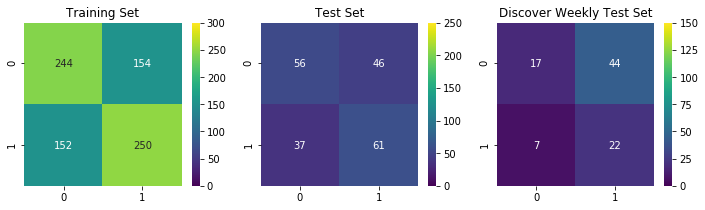

In [141]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (12,3))
#Annot: the value of the heatmap
#fmt: the decimal point of value of heatmap
#vmin, vmax: the limits of the colorbar

training_map = confusion_matrix(y_train, predict_train)
sns.heatmap(training_map, annot = True, fmt = 'd', vmin = 0, vmax = 300,cmap = 'viridis', ax = ax1)

testing_map = confusion_matrix(y_test, predict_test)
sns.heatmap(testing_map, annot = True, fmt = 'd', vmin = 0, vmax = 250,cmap = 'viridis', ax = ax2)

sns.heatmap(heat_map, annot = True, fmt = 'd', vmin = 0, vmax = 150,cmap = 'viridis', ax = ax3)

ax1.set_title('Training Set')
ax2.set_title('Test Set')
ax3.set_title('Discover Weekly Test Set')